<a href="https://colab.research.google.com/github/nicolasViniegraa/porfolio/blob/main/email_spam_detection/Email_Spam_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this exercise we'll develop several spam classifiers that predict whether an email is spam or not.

The dataset used to build the model was obtained from Kaggle, in this link:
https://www.kaggle.com/datasets/balaka18/email-spam-classification-dataset-csv


In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn import preprocessing, metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

In [12]:
data = pd.read_csv('emails.csv')

data.describe()

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
count,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,...,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000
mean,6.640565,6.188128,5.143852,3.075599,3.124710,2.627030,55.517401,2.466551,2.024362,10.600155,...,0.005027,0.012568,0.010634,0.098028,0.004254,0.006574,0.004060,0.914733,0.006961,0.290023
std,11.745009,9.534576,14.101142,6.045970,4.680522,6.229845,87.574172,4.314444,6.967878,19.281892,...,0.105788,0.199682,0.116693,0.569532,0.096252,0.138908,0.072145,2.780203,0.098086,0.453817
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,12.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,3.000000,1.000000,1.000000,2.000000,1.000000,28.000000,1.000000,0.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8.000000,7.000000,4.000000,3.000000,4.000000,2.000000,62.250000,3.000000,1.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,210.000000,132.000000,344.000000,89.000000,47.000000,77.000000,1898.000000,70.000000,167.000000,223.000000,...,4.000000,7.000000,2.000000,12.000000,3.000000,4.000000,3.000000,114.000000,4.000000,1.000000


The dataset has the following attributes:

Email No.: It's the email name, the identificator <br>
The last column has the label indicating if the email is spam or not <br>
The rest of attributes are the words that appear in all the emails, and the value in each row represents how many times does each word appears on the email. <br>

In [13]:
data.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


Now we plot a chart to visualize the amount of spam and not spam emails

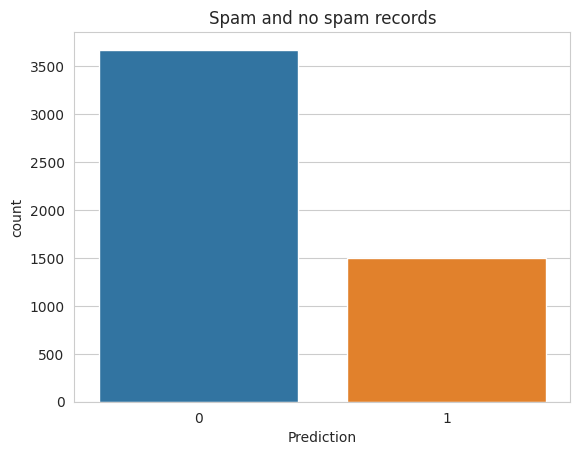

In [33]:
plt.title('Spam and no spam records')
sns.countplot(data=data, x='Prediction');

There isn't many data analysis available to make since the attributes of the dataset aren't suitable that kind of analysis

In [15]:
data.shape

(5172, 3002)

# **Preprocessing**

---



---



In [16]:
#Drop ID column
data = data.drop('Email No.', axis = 1)

In [17]:
#Split dataset in X and y
X = data.drop('Prediction', axis = 1)
y = data['Prediction']

In [18]:
#Normalize X attributes
scaler = StandardScaler()
scaler.fit(X)
scaled_data = scaler.transform(X)

In [20]:
#Split dataset in train and test with a equivalent amount of spam and not spam rows on train and test datasets
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)

for train_index, test_index in skf.split(scaled_data, y):
    X_train, X_test = scaled_data[train_index], scaled_data[test_index]
    y_train, y_test = y[train_index], y[test_index]

# **Models creation and evaluation**

---



---



## Logistic Regression

In [21]:
reg_model = LogisticRegression(random_state=0, max_iter=1000).fit(X_train, y_train)

y_pred = reg_model.predict(X_test)

Accuracy: 98.26
F1 score: 97.01
Recall: 97.33
Precision: 96.69
R2 Score: 91.55




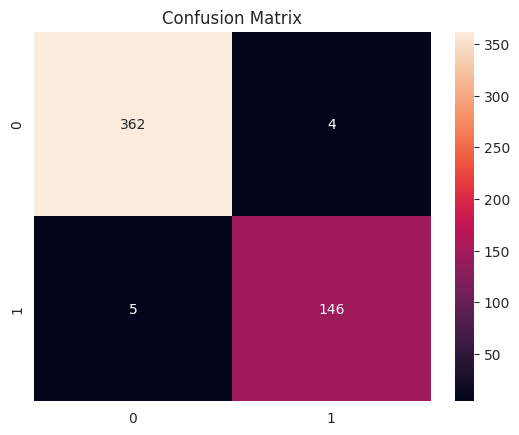

In [22]:
print('Accuracy:', round(metrics.accuracy_score(y_test, y_pred) * 100, 2))
print('F1 score:', round(metrics.f1_score(y_test, y_pred) * 100, 2))
print('Recall:', round(metrics.recall_score(y_test, y_pred) * 100, 2))
print('Precision:', round(metrics.precision_score(y_test, y_pred) * 100, 2))
print('R2 Score:', round(metrics.r2_score(y_test, y_pred) * 100, 2))
print("\n")
plt.title("Confusion Matrix")
sns.heatmap(metrics.confusion_matrix(y_pred, y_test), annot=True, fmt='g');

## K Nearest Neighbors

---



---



In [23]:
knn_model = KNeighborsClassifier(n_neighbors=8).fit(X_train, y_train)

y_pred = knn_model.predict(X_test)

Accuracy: 84.91
F1 score: 78.21
Recall: 93.33
Precision: 67.31
R2 Score: 26.75




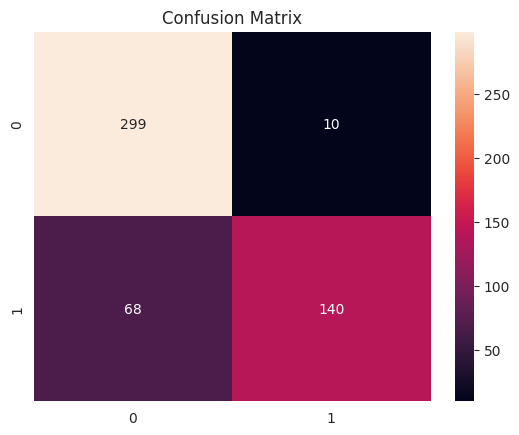

In [24]:
print('Accuracy:', round(metrics.accuracy_score(y_test, y_pred) * 100, 2))
print('F1 score:', round(metrics.f1_score(y_test, y_pred) * 100, 2))
print('Recall:', round(metrics.recall_score(y_test, y_pred) * 100, 2))
print('Precision:', round(metrics.precision_score(y_test, y_pred) * 100, 2))
print('R2 Score:', round(metrics.r2_score(y_test, y_pred) * 100, 2))
print("\n")
plt.title("Confusion Matrix")
sns.heatmap(metrics.confusion_matrix(y_pred, y_test), annot=True, fmt='g');

## Decision Tree Classifier

---



---



In [25]:
dt_model = DecisionTreeClassifier(random_state=42).fit(X_train, y_train)

y_pred = dt_model.predict(X_test)

Accuracy: 94.0
F1 score: 89.49
Recall: 88.0
Precision: 91.03
R2 Score: 70.89




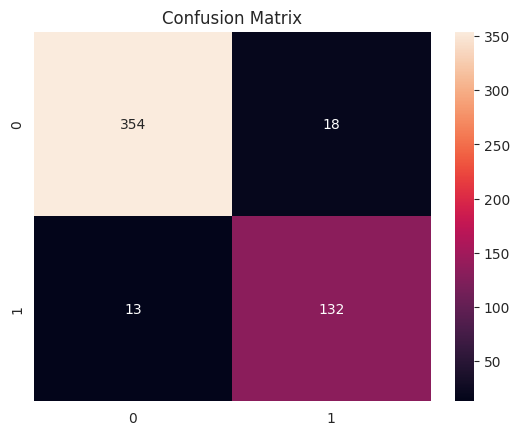

In [26]:
print('Accuracy:', round(metrics.accuracy_score(y_test, y_pred) * 100, 2))
print('F1 score:', round(metrics.f1_score(y_test, y_pred) * 100, 2))
print('Recall:', round(metrics.recall_score(y_test, y_pred) * 100, 2))
print('Precision:', round(metrics.precision_score(y_test, y_pred) * 100, 2))
print('R2 Score:', round(metrics.r2_score(y_test, y_pred) * 100, 2))
print("\n")
plt.title("Confusion Matrix")
sns.heatmap(metrics.confusion_matrix(y_pred, y_test), annot=True, fmt='g');

## Random Forest

---



---



In [27]:
rf_model = RandomForestClassifier(random_state=2, max_depth=5, criterion='entropy').fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

Accuracy: 85.3
F1 score: 66.96
Recall: 51.33
Precision: 96.25
R2 Score: 28.62




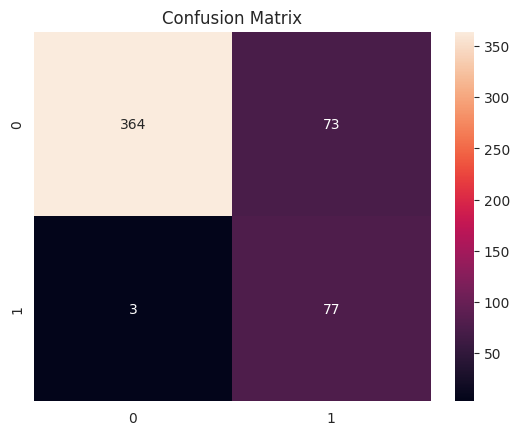

In [28]:
print('Accuracy:', round(metrics.accuracy_score(y_test, y_pred) * 100, 2))
print('F1 score:', round(metrics.f1_score(y_test, y_pred) * 100, 2))
print('Recall:', round(metrics.recall_score(y_test, y_pred) * 100, 2))
print('Precision:', round(metrics.precision_score(y_test, y_pred) * 100, 2))
print('R2 Score:', round(metrics.r2_score(y_test, y_pred) * 100, 2))
print("\n")
plt.title("Confusion Matrix")
sns.heatmap(metrics.confusion_matrix(y_pred, y_test), annot=True, fmt='g');

## Support Vector Machine

---



---



In [29]:
svc_model = SVC(random_state=2, kernel='linear' ).fit(X_train, y_train)

y_pred = svc_model.predict(X_test)

Accuracy: 94.97
F1 score: 91.28
Recall: 90.67
Precision: 91.89
R2 Score: 75.58




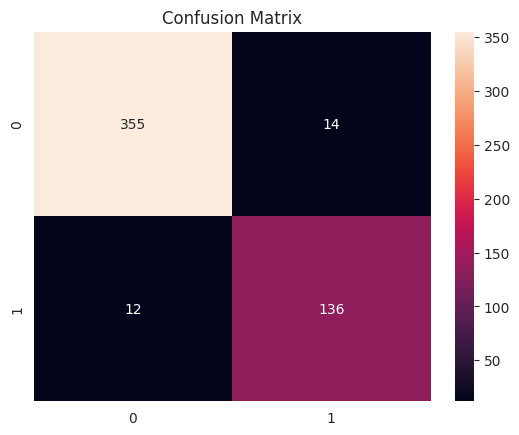

In [30]:
print('Accuracy:', round(metrics.accuracy_score(y_test, y_pred) * 100, 2))
print('F1 score:', round(metrics.f1_score(y_test, y_pred) * 100, 2))
print('Recall:', round(metrics.recall_score(y_test, y_pred) * 100, 2))
print('Precision:', round(metrics.precision_score(y_test, y_pred) * 100, 2))
print('R2 Score:', round(metrics.r2_score(y_test, y_pred) * 100, 2))
print("\n")
plt.title("Confusion Matrix")
sns.heatmap(metrics.confusion_matrix(y_pred, y_test), annot=True, fmt='g');

## Ada Boost Classifier

---


---




In [31]:
ab_model = AdaBoostClassifier(random_state=2).fit(X_train, y_train)

y_pred = ab_model.predict(X_test)

Accuracy: 97.1
F1 score: 95.02
Recall: 95.33
Precision: 94.7
R2 Score: 85.91




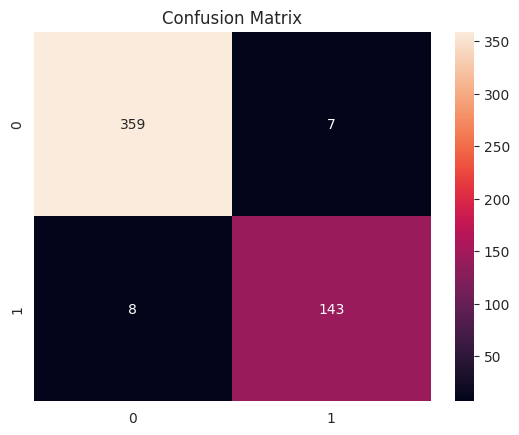

In [32]:
print('Accuracy:', round(metrics.accuracy_score(y_test, y_pred) * 100, 2))
print('F1 score:', round(metrics.f1_score(y_test, y_pred) * 100, 2))
print('Recall:', round(metrics.recall_score(y_test, y_pred) * 100, 2))
print('Precision:', round(metrics.precision_score(y_test, y_pred) * 100, 2))
print('R2 Score:', round(metrics.r2_score(y_test, y_pred) * 100, 2))
print("\n")
plt.title("Confusion Matrix")
sns.heatmap(metrics.confusion_matrix(y_pred, y_test), annot=True, fmt='g');

After developing and testing each model we reach to the conclusion that the model with best performance is the Logistinc Regression model, not only because it's the one that predicts less False cases, as we can see in the confusion matrix, but also because it has the best metrics among all the models, followed by AdaBoost Classifier that is really close.

In this exercise is very important to minimize not only the False Negative cases (real Spam emails predicted as No Spam), but also the Falso Positives (No Spam emails predicted as Spam). This is because we want two things with a Spam Detector, to move the spam emails to a secondary folder, so that the user can see in a more organized way his emails, but also to keep the no-spam emails on the main folder. If we predict a no-spam email as a spam, we will move that email to the spam folder, and it's an important email that the user may miss because of the inaccuracy of the spam detection. So that's why it's really important to minimize all False cases of the confusion matrix.